# Challenge 1

## SciPy Tutorial
Pertinent information about [SciPy](https://docs.scipy.org/) and NumPy is available in the [SciPy Tutorial](https://docs.scipy.org/doc/scipy/reference/tutorial/index.html).
 * Read [Introduction](https://docs.scipy.org/doc/scipy/reference/tutorial/general.html)
 * Read [Basic functions](https://docs.scipy.org/doc/scipy/reference/tutorial/basic.html)
 * Read [Optimization](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html)
 
Consider the function defined below.
 * Plot the function using [matplotlib](https://matplotlib.org/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

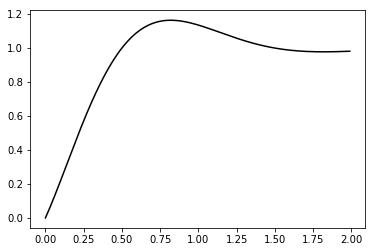

In [3]:
def g(t):
    return 1 - (np.exp(-2*t) * np.cos(np.pi*t))

t1 = np.arange(0.0, 2.0, 0.01)

plt.figure(1)
plt.plot(t1, g(t1), 'k')
plt.show()

Consider the class of functions of the form $f(t) = 1 - e^{-at}$ where $a$ is a free parameter.
 * Find the value of $a$ that minimizes the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0, 2]$
 * Computer the residual mean squared error
 * Explain how you obtained $a$

the value of a is 4.60357809561
the mean squared error is 0.011318183511


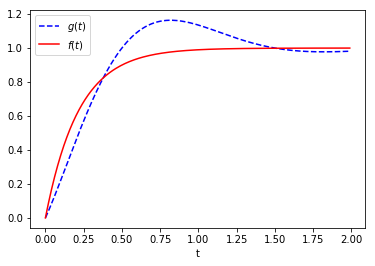

In [6]:
from scipy.optimize import curve_fit 
import numpy as np
import matplotlib.pyplot as plt

def g(t):
    return 1 - (np.exp(- 2 * t) * np.cos(np.pi*t))
def f(t,a):
    return 1 - (np.exp(- a * t))
def MSE_func(t1,t2):
    n=int(2.0/0.01)
    sum=0
    for i in range(n):
        sum+=(y1[i]-y2[i])**2
    return sum/n

t1 = np.arange(0.0, 2.0, 0.01)
y1=g(t1)
plt.xlabel('t')
plt.plot(t1,y1 ,'b--',label='$g(t)$')

popt, pcov = curve_fit(f, t1, y1)
y2 = [f(i, popt[0]) for i in t1]
plt.plot(t1,y2,'r-',label='$f(t)$')
print ("the value of a is",popt[0])
plt.legend()
MSE_value=MSE_func(y1,y2)
print ("the mean squared error is",MSE_value)
plt.show()

As we know, $L_2$ norm in a vector space is $$||X||_2=(|X_1|^2+|X_2|^2+......|X_n|^2)^ {1/2}$$ Since it operates on the absolute values, we do not need to consider the issue about if the function is above the other one all the time. All we need to do is to find a $f(t)$ which is extremely close to $g(t)$ so that the sum of $L_2$ norm will be the minimum. Hence, we can solve this problem by finding an optimal curve-fitting function which derived from the $f(t)$. In programming I use the function curve_fit which is imported from scipy.optimize package to find the optimal curve-fitting function. And the value of a is what we want to minimize the $L_2$ norm between $g(t)$ and $f(t)$ over the interval $[0,2]$.